In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
NUM_CLASSES = 10


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

W0824 14:56:59.816749 140184988288832 deprecation_wrapper.py:119] From /home/ian/anaconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 14:56:59.826827 140184988288832 deprecation_wrapper.py:119] From /home/ian/anaconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 14:56:59.834062 140184988288832 deprecation_wrapper.py:119] From /home/ian/anaconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [7]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


W0824 14:57:02.098922 140184988288832 deprecation_wrapper.py:119] From /home/ian/anaconda3/envs/generative/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0824 14:57:02.104097 140184988288832 deprecation_wrapper.py:119] From /home/ian/anaconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [10]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 11s 218us/step - loss: 1.5576 - acc: 0.4475
Epoch 2/10
50000/50000 [==============================] - 11s 213us/step - loss: 1.5122 - acc: 0.4608
Epoch 3/10
50000/50000 [==============================] - 11s 214us/step - loss: 1.4808 - acc: 0.4750
Epoch 4/10
50000/50000 [==============================] - 11s 216us/step - loss: 1.4465 - acc: 0.4849
Epoch 5/10
50000/50000 [==============================] - 11s 213us/step - loss: 1.4193 - acc: 0.4968
Epoch 6/10
50000/50000 [==============================] - 11s 211us/step - loss: 1.3985 - acc: 0.5006
Epoch 7/10
50000/50000 [==============================] - 11s 216us/step - loss: 1.3722 - acc: 0.5114
Epoch 8/10
50000/50000 [==============================] - 11s 219us/step - loss: 1.3544 - acc: 0.5195
Epoch 9/10
50000/50000 [==============================] - 11s 215us/step - loss: 1.3343 - acc: 0.5239
Epoch 10/10
50000/50000 [==============================] - 12s 241us/step - loss: 

In [11]:
CLASSES = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
])

In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 47us/step


[1.4140845464706422, 0.4914]

In [13]:
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [14]:
preds.shape

(10000, 10)

In [15]:
import matplotlib.pyplot as plt

In [16]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

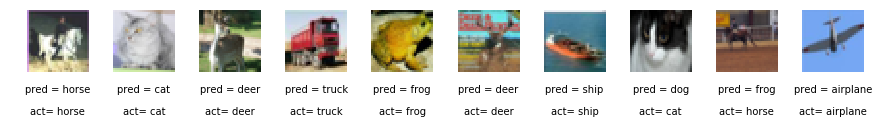

In [18]:
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
  
    ax.axis('off')

    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act= ' + str(actual_single[idx]), fontsize=10,
           ha='center', transform=ax.transAxes)
    ax.imshow(img)